#### Visualization Analysis of Yu Classification Model

This notebook visualizes wafer maps that are misclassified by the Yu classification model.

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, optimizers, regularizers

import os
import numpy as np
import pandas as pd
import pickle5 as pickle

import helpers as helper
import seaborn as sns
from sklearn.metrics import confusion_matrix

import time
import random

#### Load data

In [3]:
# load predictions
with open(f'../results/yuclassify-WM-clean-id224filter7-clsaug-firstrun2.pkl', "rb") as fh:
    y_pred = pickle.load(fh)
print(len(y_pred))
y_pred

3828


array([1, 3, 4, ..., 1, 0, 3])

In [4]:
# load test data
test = helper.load(f'../data/resized224/WM-clean-id224filter7-test.zip')
test = test[test.failureType != 'none'].reset_index(drop=True)
print(test.shape)
test.head()

(3828, 8)


,ID,dieSize,lotName,failureType,dataset,detectLabels,classifyLabels,filterMap7
0,42,2460.0,lot2,Edge-Loc,test,1,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,97,2460.0,lot5,Edge-Ring,test,1,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,130,2460.0,lot6,Scratch,test,1,5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,173,533.0,lot8,Edge-Ring,test,1,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,346,533.0,lot16,Edge-Loc,test,1,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
# must subtract 1 because classifyLabels is numbered with none as 0
y_test = np.asarray(test.classifyLabels) - 1
print(type(y_test))
print(len(y_test))

<class 'numpy.ndarray'>
3828


#### Visualize mis-classified wafer maps

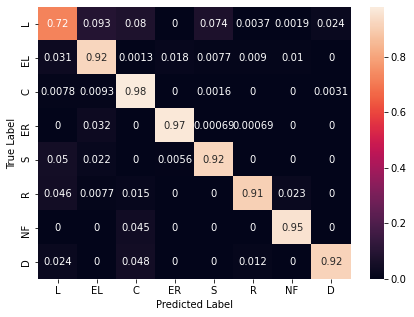

In [6]:
# plot confusion matrix
helper.plot_confusion_matrix(y_test, y_pred, normalize=True)

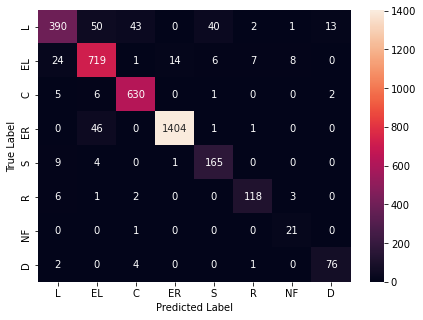

In [7]:
# plot confusion matrix counts
helper.plot_confusion_matrix(y_test, y_pred, normalize=False)

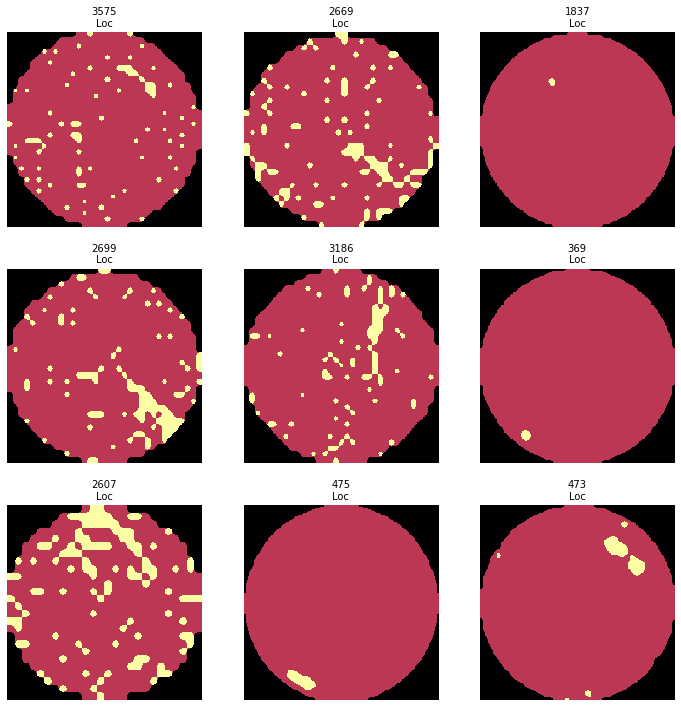

In [16]:
# visualize misclassified wafer maps using helper function
# true_label is the actual label of the sample
# pred_label is the (mistakenly) predicted label of the sample
# n is the number of randomly selected samples to visualize (must visualize at least 2)
helper.visualize_misclassified(test, y_test, y_pred, true_label=0, pred_label=4, n=9, 
                               col='filterMap7', cmap='inferno')